## Data Exploration for Powerball Analysis

In this section, we are going to be going through some of the data to find insights on what all these numbers and stats really mean.  

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import re #For reference, re is regular expression support and can be used to search for patterns in STR's
import requests
from bs4 import BeautifulSoup
import re

### Reading in Powerball CSV file

In [288]:
df = pd.read_csv(r"Powerball.csv", encoding='latin-1')
df.head(8)

,#,Draw Date,Jackpot Prize,Winner,State
0,1,"February 01, 2003",$101 million,Rondal Eaton,Indiana
1,Watertown 34,South Dakota,NaN,NaN,NaN
2,2,"February 22, 2003",$42 million,"Cello Investments, LLC",Louisiana
3,Milton and Ethel Schroeder,Missouri,NaN,NaN,NaN
4,3,"March 26, 2003",$62.4 million,Hobert & Mary Parnell,West Virginia
5,4,"May 07, 2003",$88.7 million,Anthony and Monica Wilson,South Carolina
6,5,"July 09, 2003",$261.3 million,William and Claudia Walkenbach,Missouri
7,Scott and Marian Calligan,Pennsylvania,NaN,NaN,NaN


### Cleaning Powerball CSV File

In [289]:
df.columns #This is just to see all the columns we are working with.  If there were more this would be more useful

Index(['#', 'Draw Date', 'Jackpot Prize', 'Winner', 'State'], dtype='object')

In [290]:
df.dtypes #This just helps to see what kind of columns it is, these are all objects, so they are string types

#                object
Draw Date        object
Jackpot Prize    object
Winner           object
State            object
dtype: object

In [291]:
df.describe() #This gives us some stats on what this set of data entails

,#,Draw Date,Jackpot Prize,Winner,State
count,233,233,210,210,210
unique,233,228,177,187,44
top,1,Pennsylvania,$50 Million,Not Disclosed,Pennsylvania
freq,1,3,9,11,15


In [292]:
df = df.drop_duplicates() #Saves dupe drops into the dataFrame
df.head(8)

,#,Draw Date,Jackpot Prize,Winner,State
0,1,"February 01, 2003",$101 million,Rondal Eaton,Indiana
1,Watertown 34,South Dakota,NaN,NaN,NaN
2,2,"February 22, 2003",$42 million,"Cello Investments, LLC",Louisiana
3,Milton and Ethel Schroeder,Missouri,NaN,NaN,NaN
4,3,"March 26, 2003",$62.4 million,Hobert & Mary Parnell,West Virginia
5,4,"May 07, 2003",$88.7 million,Anthony and Monica Wilson,South Carolina
6,5,"July 09, 2003",$261.3 million,William and Claudia Walkenbach,Missouri
7,Scott and Marian Calligan,Pennsylvania,NaN,NaN,NaN


In [293]:
df = df.drop(columns = "#") # Got rid of '#' column, that was a product of my enumerate loop in the webscraper, it was not as useful as I thought it would be

In [294]:
pd.set_option('display.max_rows', 1000) #This increases the amount displayed to REALLY take a look at everything
df.head(8)

,Draw Date,Jackpot Prize,Winner,State
0,"February 01, 2003",$101 million,Rondal Eaton,Indiana
1,South Dakota,NaN,NaN,NaN
2,"February 22, 2003",$42 million,"Cello Investments, LLC",Louisiana
3,Missouri,NaN,NaN,NaN
4,"March 26, 2003",$62.4 million,Hobert & Mary Parnell,West Virginia
5,"May 07, 2003",$88.7 million,Anthony and Monica Wilson,South Carolina
6,"July 09, 2003",$261.3 million,William and Claudia Walkenbach,Missouri
7,Pennsylvania,NaN,NaN,NaN


In [295]:
df = df.dropna() #Get's rid of all the Null rows, rows with no info are useless
df.head(8)

,Draw Date,Jackpot Prize,Winner,State
0,"February 01, 2003",$101 million,Rondal Eaton,Indiana
2,"February 22, 2003",$42 million,"Cello Investments, LLC",Louisiana
4,"March 26, 2003",$62.4 million,Hobert & Mary Parnell,West Virginia
5,"May 07, 2003",$88.7 million,Anthony and Monica Wilson,South Carolina
6,"July 09, 2003",$261.3 million,William and Claudia Walkenbach,Missouri
8,"July 16, 2003",$13.5 million,"Alva ""Jeanie"" Osborne",Kentucky
9,"August 30, 2003",$135 million,"Aeetos Trust, Rosemary Centola & Lawrence Centola",New Hampshire
10,"October 25, 2003",$190.9 million,Regina Mandabach,Indiana


### Analyzing Powerball Data

In [296]:
df['Jackpot Prize'].value_counts().head(8) #How many times each Jackpot amount was won

Jackpot Prize
$50 Million      9
$15 million      6
$80 Million      4
$70 Million      4
$60 Million      4
$25 Million      2
$136 Million     2
$61.5 million    2
Name: count, dtype: int64

In [297]:
df['State'].value_counts().head(8) #Of the recent Jackpots won, PN. had the most wins

State
Pennsylvania    15
Florida         14
Indiana         12
New York        12
California      10
New Jersey      10
Missouri        10
Wisconsin        9
Name: count, dtype: int64

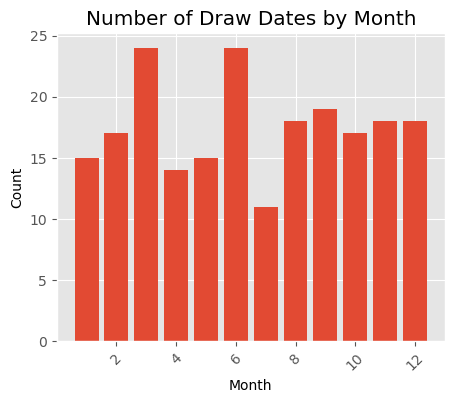

In [298]:
# Converting Data to Datetime for analysis

import datetime as dt

df_date = pd.to_datetime(df["Draw Date"])
df_date['date'] = df_date.dt.date
df_date['date'] =  pd.to_datetime(df_date['date'], format='%Y-%m-%d')

df_date['Month'] = df_date['date'].dt.month
df_date['Year'] = df_date['date'].dt.year
df_date['Day'] = df_date['date'].dt.weekday

df_date ["Month"].value_counts()

month = df_date["Month"].value_counts().index
count = df_date["Month"].value_counts().values

plt.bar(month, count)

plt.title("Number of Draw Dates by Month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show() 

In [299]:
df_date ["Day"].value_counts() #Because of datetime this might look wonky, 2 = Wed, 5 = Sat, 0 = Mon  

Draw Date
2    105
5    103
0      2
Name: count, dtype: int64

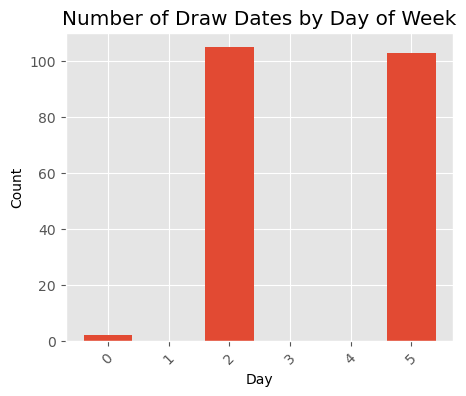

In [300]:
day = df_date["Day"].value_counts().index
count = df_date["Day"].value_counts().values

plt.bar(day, count)

plt.title("Number of Draw Dates by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show()

#Pretty close between Wednesday and Saturday, with Wed squeaking out a win

In [301]:
df_date['Month'].value_counts() #Tied for top is March and June, intresting.  Worst is July, maybe because of people spending money on vacations?

Draw Date
3     24
6     24
9     19
8     18
11    18
12    18
2     17
10    17
5     15
1     15
4     14
7     11
Name: count, dtype: int64

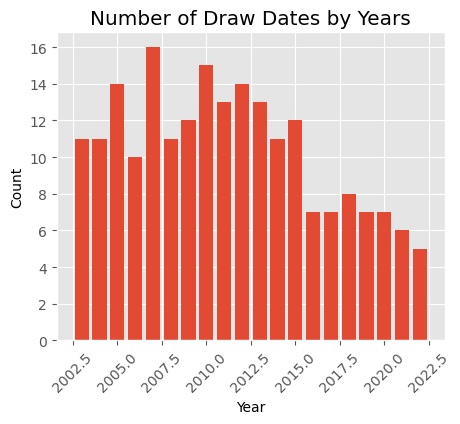

In [302]:
year = df_date["Year"].value_counts().index
count = df_date["Year"].value_counts().values

plt.bar(year, count)

plt.title("Number of Draw Dates by Years")
plt.xlabel("Year")
plt.ylabel("Count")

plt.xticks(rotation=45)

plt.show()

#Pretty close between Wednesday and Saturday, with Wed squeaking out a win.  This is also about 20 years of wins.

In [303]:
df['Winner'].value_counts() #Just wanted to see if there were any people that hit twice, not in this set.

Winner
Not Disclosed                                        11
Unknown                                              10
Name Withheld                                         3
Not claimed yet                                       3
Rondal Eaton                                          1
David & Erica Harrig                                  1
Dave & Nancy Honeywell                                1
Pedro Quezada                                         1
Ted Baumgartner                                       1
Gloria C. MacKenzie                                   1
Paul McDowell                                         1
Patricia Chandler                                     1
Mario Scarnici                                        1
Carlo "Carl" Mitchell                                 1
Kevin Carlson                                         1
Rosa DeLeon and Reginald LeBlanc                      1
B. Raymond Buxton                                     1
Joseph Saxer                             

#### This is a Single Subplot to show States by Wins Below

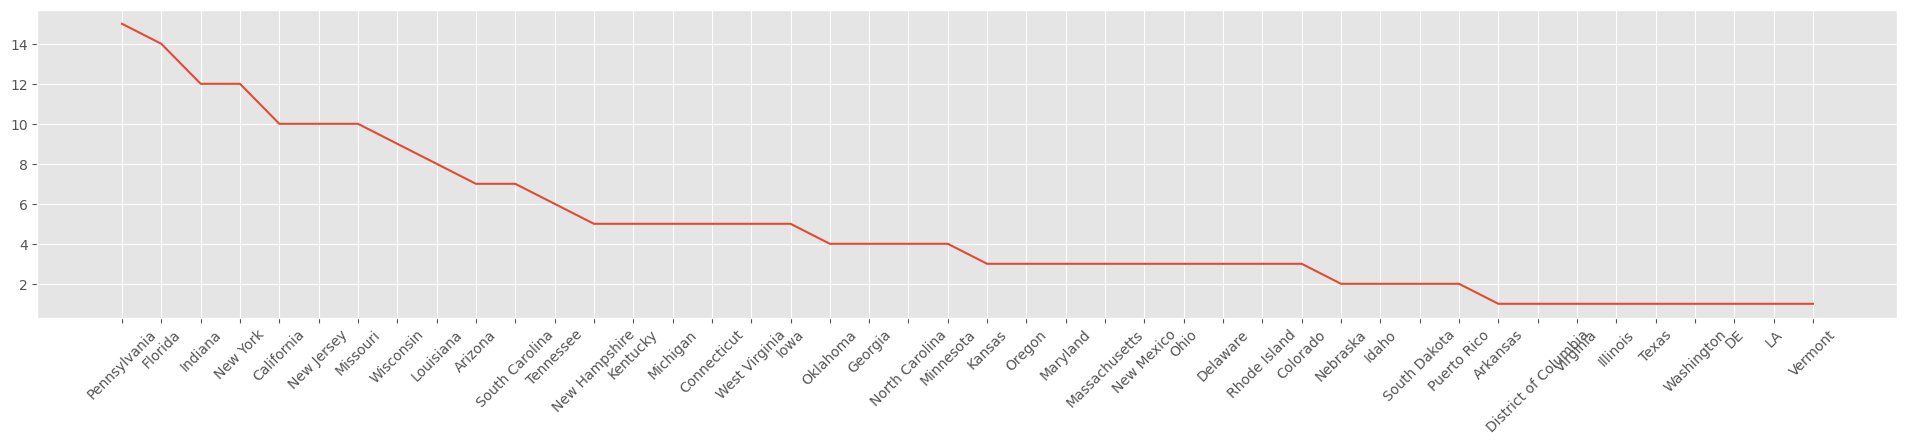

State
Pennsylvania    15
Florida         14
Indiana         12
New York        12
California      10
New Jersey      10
Missouri        10
Wisconsin        9
Name: count, dtype: int64


In [304]:
state = df["State"].value_counts().index
count = df["State"].value_counts().values

fig = plt.figure(figsize=(24, 4))
ax = fig.add_subplot(111)
ax.plot(state, count)

plt.xticks(rotation=45)

plt.show()
print(df['State'].value_counts().head(8))

### From the figures below, we can see that the frequency of jackpots being hit has gone down, but the jackpots being won has gone up over the years.

In [305]:
df_date ["Year"].value_counts() #2016 and beyond seems to be the years where less people won

Draw Date
2007    16
2010    15
2005    14
2012    14
2013    13
2011    13
2015    12
2009    12
2004    11
2014    11
2003    11
2008    11
2006    10
2018     8
2016     7
2017     7
2019     7
2020     7
2021     6
2022     5
Name: count, dtype: int64

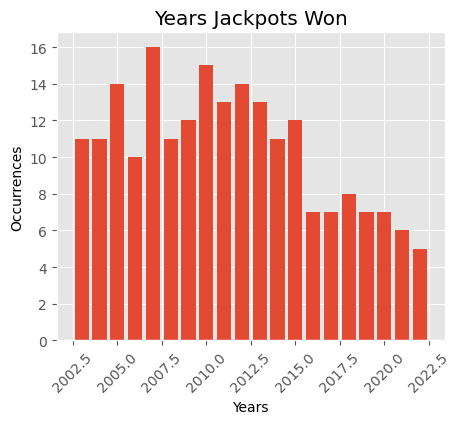

In [306]:
year = df_date["Year"].value_counts().index
count = df_date["Year"].value_counts().values

plt.bar(year, count)

plt.rcParams["figure.figsize"] = (5, 4)

plt.title("Years Jackpots Won")
plt.xlabel("Years")
plt.ylabel("Occurrences")

plt.xticks(rotation=45)

plt.show()

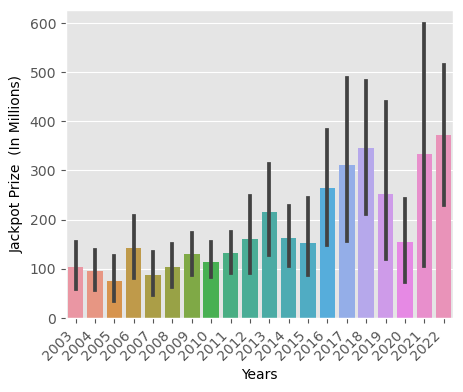

In [307]:
# Converts the str OBJ to a int value.  Because the millions data was a string I had to get the numbers themselves
def convert_to_numeric(x):
    return int(re.findall(r'\d+', x)[0]) #r'\d+' find's one or more digits in str 'x', the [0] is the first element found.  The int then converts that to int.

money = df['Jackpot Prize'].map(convert_to_numeric)

x = df_date["Year"]
y = money



sns.barplot(x = x, y = y)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Years")
plt.ylabel("Jackpot Prize  (In Millions)")
plt.show()
#The long, thin rectangles are error bars.  These show the range of variation in the data, main bars are the averages of the values

In [308]:
# The average Jackpot Prize size in Millions
money.mean()

163.35238095238094

#### My PyCharm wasn't exporting this Scraped file to a CSV correctly for some reason, so I just did it here

In [309]:
url = "https://www.statista.com/statistics/215265/sales-of-us-state-and-provincial-lotteries/"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")

tab = soup.find("table",{"class":"table hidden"})

header = []
rows = []

for i, row in enumerate(tab('tr')):
    if i == 0:
        header = [el.text.strip() for el in row.find_all('th')]
    else:
        rows.append([el.text.strip() for el in row.find_all('td')])

# print(header)
# for row in rows:
#     print(row)
    
result = []
result.append(header)
for row in rows:
    result.append(row)

In [310]:
# Converting Scraper results to dataFrame
df2 = pd.DataFrame(result)

In [311]:
df2.head(5)

,0,1
0,Characteristic,Sales in billion U.S. dollars
1,2022,107.92
2,2021,105.24
3,2020,89.59
4,2019,91.32


In [312]:
# Cleaning up the columns names
df2.columns = ['Years', 'Sales(In_Billions)']
df2.head(8)

,Years,Sales(In_Billions)
0,Characteristic,Sales in billion U.S. dollars
1,2022,107.92
2,2021,105.24
3,2020,89.59
4,2019,91.32
5,2018,85.59
6,2017,80.39
7,2016,80.55


In [313]:
# Dropping Scraper first row
df2 = df2.drop(index=0)

In [314]:
# Converting to Int to use for graph
def convert_to_numeric(x):
    return int(re.findall(r'\d+', x)[0])

money = df2['Sales(In_Billions)'].map(convert_to_numeric)
df2['Sales(In_Billions)'] = money
df2['Sales(In_Billions)'].astype(int)

1     107
2     105
3      89
4      91
5      85
6      80
7      80
8      73
9      70
10     68
11     68
12     63
13     58
14     58
Name: Sales(In_Billions), dtype: int32

In [315]:
df2

,Years,Sales(In_Billions)
1,2022,107
2,2021,105
3,2020,89
4,2019,91
5,2018,85
6,2017,80
7,2016,80
8,2015,73
9,2014,70
10,2013,68


### The graph below shows how the Sale of Powerball has gone up.  We can conclude Sales have gone up, Jackpots have gone up and times hit have gone down.  I believe this is pretty good evidence of the shrinking Middle class.  That means that people aren't just buying 1 ticket.  People are buying multiple tickets, mostly in areas where there is a higher Wealth Inequality, but everywhere based on the data.

### Sales by Years Graph

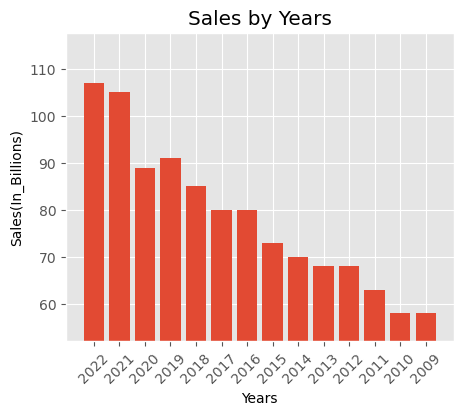

In [318]:
x = df2['Years']
y = df2['Sales(In_Billions)']

plt.bar(x, y)


plt.title("Sales by Years")
plt.xlabel("Years")
plt.ylabel("Sales(In_Billions)")

plt.xticks(rotation=45)
plt.ylim(min(y) * 0.9, max(y) * 1.1)

plt.show()

### Converting Cleaned Dataframe to CSV for SQL and Tableau 

In [ ]:
#df.to_csv('Data_Explore_State_Powerball.csv')